# Problem Statement - Predict fare of taxi ride

# Analytic Approach -  Regression problem

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [77]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Importing dataset

In [78]:
df = pd.read_csv("D:/Imarticus/Datasets/TaxiFare.csv")

In [79]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
17207,07:00.0,36.90,2009-10-31 02:07:00 UTC,-73.967253,40.756218,-74.035277,40.620233,1
6926,39:58.0,7.00,2015-02-11 06:39:58 UTC,-73.985558,40.768345,-73.974312,40.755005,1
46820,37:00.0,31.07,2010-03-21 15:37:00 UTC,-73.862780,40.769083,-73.977510,40.791303,1
376,57:22.0,2.50,2014-05-29 05:57:22 UTC,0.000000,0.000000,0.000000,0.000000,1
18630,52:06.0,7.40,2009-03-28 22:52:06 UTC,-73.994576,40.723110,-74.000912,40.733793,1
40783,15:18.0,8.10,2012-06-27 01:15:18 UTC,-73.972058,40.782122,-73.972058,40.782122,1
18335,29:00.0,8.10,2012-07-31 13:29:00 UTC,-73.968545,40.761490,-73.958087,40.781922,1
6373,50:11.0,14.00,2015-06-06 15:50:11 UTC,-73.991570,40.749844,-73.963646,40.774036,1
5920,20:05.0,9.70,2012-03-21 20:20:05 UTC,-73.968886,40.754262,-73.995257,40.735794,1
47670,29:00.0,5.30,2011-05-22 00:29:00 UTC,-73.949632,40.784540,-73.937928,40.798730,5


In [80]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [81]:
df.shape

(50000, 8)

# Data cleaning

In [82]:
df.drop('unique_id',axis=1,inplace=True)

In [83]:
df.shape

(50000, 7)

In [84]:
def morning (row):
    if ((row['hour'] < 12) and (row['hour'] >= 4)):
        return 1
    else:
        return 0
    
def afternoon (row):
    if ((row['hour'] < 15 ) and (row['hour'] >= 12)):
        return 1
    else:
        return 0
    
def evening (row):
    if ((row['hour'] <= 18 ) and (row['hour'] >= 15)):
        return 1
    else:
        return 0

def night (row):
    if ((row['hour'] <= 22) and (row['hour'] > 18)):
        return 1
    else:
        return 0
    
    
def late_night (row):
    if (row['hour'] < 4) or (row['hour'] > 22):
        return 1
    else:
        return 0 

In [85]:
def add_time_features(df):
    
    df['date_time_of_pickup'] =  pd.to_datetime(df['date_time_of_pickup'], format='%Y-%m-%d %H:%M:%S %Z')
    
    df['year'] = df['date_time_of_pickup'].apply(lambda x: x.year)
    df['month'] = df['date_time_of_pickup'].apply(lambda x: x.month_name())
    df['day'] = df['date_time_of_pickup'].apply(lambda x: x.day)
    df['hour'] = df['date_time_of_pickup'].apply(lambda x: x.hour)
    df['minute'] = df['date_time_of_pickup'].apply(lambda x: x.minute)
    df['weekday'] = df['date_time_of_pickup'].apply(lambda x: x.day_name())
    
    df['date_time_of_pickup'] =  df['date_time_of_pickup'].apply(lambda x: str(x))
    
    df['morning'] = df.apply (lambda x: morning(x), axis=1)
    df['afternoon'] = df.apply (lambda x: afternoon(x), axis=1)
    df['evening'] = df.apply (lambda x: evening(x), axis=1)
    df['night'] = df.apply (lambda x: night(x), axis=1)
    df['late_night'] = df.apply (lambda x: late_night(x), axis=1)
    
    # Drop 'pickup_datetime' as we won't need it anymore
    df = df.drop('date_time_of_pickup', axis=1)
    
    return df

In [86]:
df = add_time_features(df)

In [87]:
df.head(20)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,weekday,morning,afternoon,evening,night,late_night
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,June,15,17,26,Monday,0,0,1,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,January,5,16,52,Tuesday,0,0,1,0,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,August,18,0,35,Thursday,0,0,0,0,1
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,April,21,4,30,Saturday,1,0,0,0,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,March,9,7,51,Tuesday,1,0,0,0,0
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011,January,6,9,50,Thursday,1,0,0,0,0
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,2012,November,20,20,35,Tuesday,0,0,0,1,0
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1,2012,January,4,17,22,Wednesday,0,0,1,0,0
8,9.0,-74.006462,40.726713,-73.993078,40.731628,1,2012,December,3,13,10,Monday,0,1,0,0,0
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2,2009,September,2,1,11,Wednesday,0,0,0,0,1


In [88]:
# Specify the column names to check
columns_to_check = ['morning', 'afternoon','evening', 'night', 'late_night']

# Check if all rows have a value of 0 for the specified columns
all_zero_rows = (df[columns_to_check] == 0).all(axis=1)

# Print the rows where all specified columns have a value of 0
print(df[all_zero_rows].value_counts())


Series([], dtype: int64)


In [89]:
cols = ['year', 'month', 'day', 'hour', 'minute', 'weekday', 'morning','afternoon', 'evening', 'night', 'late_night']

for i in cols:
    print(i,' - ', sorted(df[i].unique()))

year  -  [2009, 2010, 2011, 2012, 2013, 2014, 2015]
month  -  ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']
day  -  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
hour  -  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
minute  -  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
weekday  -  ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
morning  -  [0, 1]
afternoon  -  [0, 1]
evening  -  [0, 1]
night  -  [0, 1]
late_night  -  [0, 1]


In [90]:
df['morning'] = df['morning'].astype(str).replace({'0':'No','1':'Yes'})
df['afternoon'] = df['afternoon'].astype(str).replace({'0':'No','1':'Yes'})
df['evening'] = df['evening'].astype(str).replace({'0':'No','1':'Yes'})
df['night'] = df['night'].astype(str).replace({'0':'No','1':'Yes'})
df['late_night'] = df['late_night'].astype(str).replace({'0':'No','1':'Yes'})

df.head(20)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,weekday,morning,afternoon,evening,night,late_night
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,June,15,17,26,Monday,No,No,Yes,No,No
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,January,5,16,52,Tuesday,No,No,Yes,No,No
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,August,18,0,35,Thursday,No,No,No,No,Yes
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,April,21,4,30,Saturday,Yes,No,No,No,No
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,March,9,7,51,Tuesday,Yes,No,No,No,No
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011,January,6,9,50,Thursday,Yes,No,No,No,No
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,2012,November,20,20,35,Tuesday,No,No,No,Yes,No
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1,2012,January,4,17,22,Wednesday,No,No,Yes,No,No
8,9.0,-74.006462,40.726713,-73.993078,40.731628,1,2012,December,3,13,10,Monday,No,Yes,No,No,No
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2,2009,September,2,1,11,Wednesday,No,No,No,No,Yes


In [91]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
year                      int64
month                    object
day                       int64
hour                      int64
minute                    int64
weekday                  object
morning                  object
afternoon                object
evening                  object
night                    object
late_night               object
dtype: object

# Data visualization

## Univariate visualization

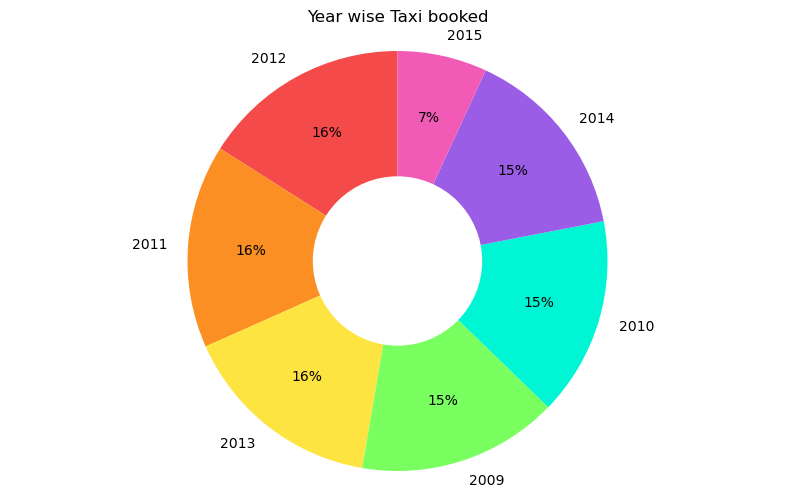

In [92]:
plt.figure(figsize=(10, 6))

freq = df['year'].value_counts()
counts = freq.to_list()
keys = freq.keys().to_list()

colors=["#f44a4a","#fb8f23","#fee440","#7aff60","#00f5d4","#9b5de5","#f15bb5"]

plt.pie(x=counts,labels=keys,colors=colors,autopct='%1.0f%%',startangle=90, pctdistance=0.70)

circle = plt.Circle(xy=(0,0),radius=0.4,color='white')
plt.gcf()
plt.gca().add_artist(circle)
plt.axis('equal')
plt.title("Year wise Taxi booked")
plt.show()

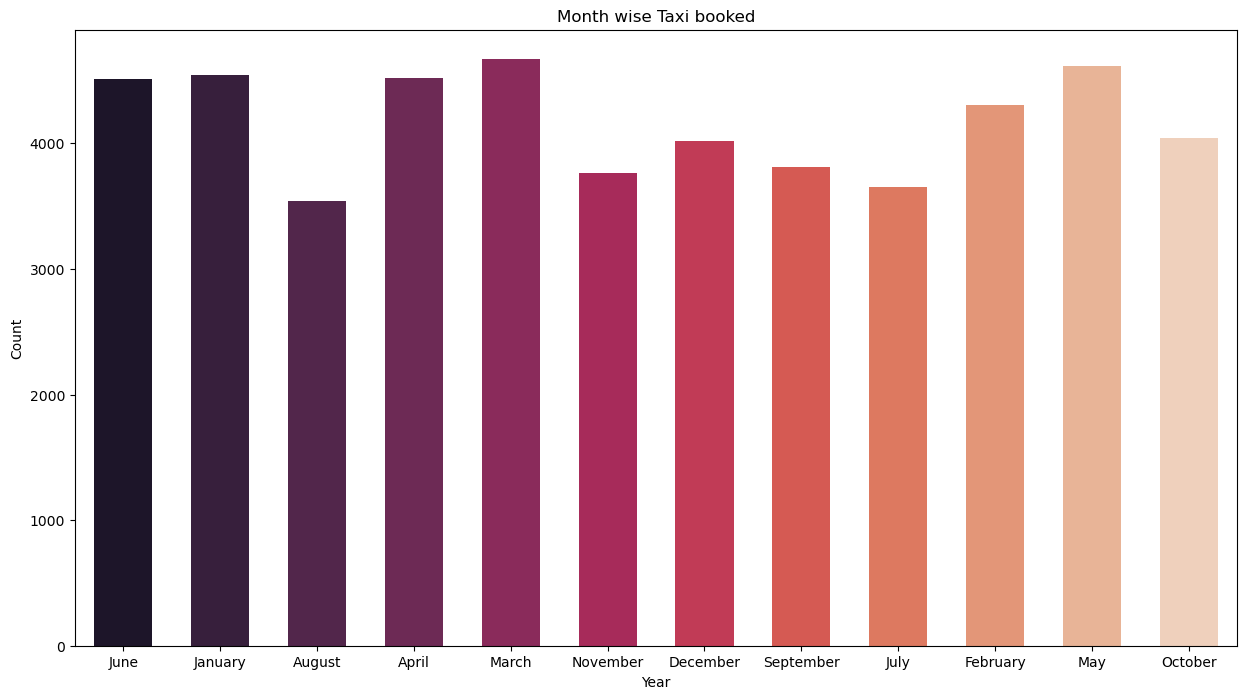

<Figure size 1000x600 with 0 Axes>

In [93]:
plt.figure(figsize=(15, 8))

colors = ["#ff0000","#ff8700","#ffd300","#deff0a","#a1ff0a","#0aff99","#0aefff","#147df5","#580aff","#be0aff","#f8acff", "#07f49e"]
sns.countplot(data=df, x='month',palette='rocket',width=0.6)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Month wise Taxi booked')

plt.figure(figsize=(10, 6))
plt.show()

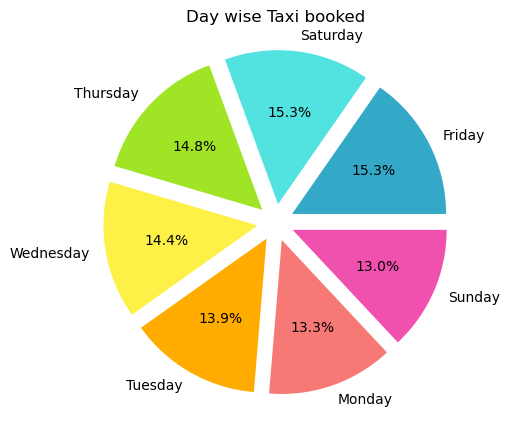

In [94]:
plt.figure(figsize=(10, 5))

freq = df['weekday'].value_counts()
keys = freq .keys().to_list()
counts = freq.to_list()
colors=["#33a8c7","#52e3e1","#a0e426","#fdf148","#ffab00","#f77976","#f050ae","#d883ff","#9336fd"]
explode = [0.12]*7
plt.pie(x=counts,labels = keys,autopct='%1.1f%%',explode = explode,colors=colors)
plt.title("Day wise Taxi booked")
plt.show()

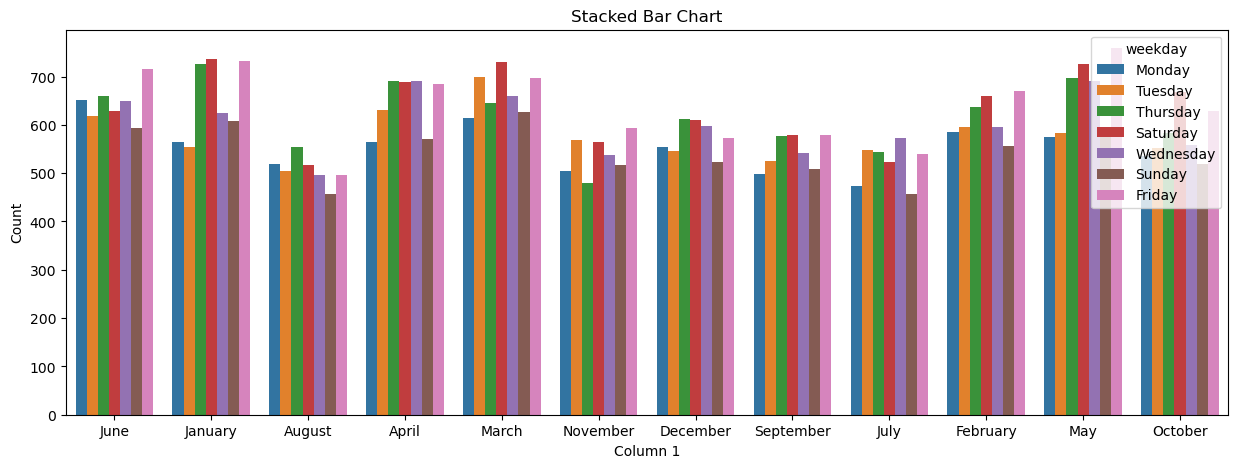

In [95]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="month", hue="weekday")
plt.xlabel("Column 1")
plt.ylabel("Count")
plt.title("Stacked Bar Chart")
plt.show()


# Data cleaning

In [96]:
df.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'year', 'month', 'day', 'hour', 'minute', 'weekday', 'morning',
       'afternoon', 'evening', 'night', 'late_night'],
      dtype='object')

In [97]:
# Remove inconsistent values
df[(df['longitude_of_pickup'] == df['longitude_of_dropoff'])].shape

(1464, 17)

In [98]:
df[(df['latitude_of_pickup'] == df['latitude_of_dropoff'])].shape

(1460, 17)

In [99]:
year_min_fare = df.groupby('year')['amount'].min()
print(year_min_fare)

year
2009    2.5
2010   -2.9
2011    2.5
2012    2.5
2013   -3.0
2014    2.5
2015   -5.0
Name: amount, dtype: float64


In [100]:
(df['amount'] <= 0).any()

True

In [101]:
(df['amount'] <= 0).sum()

9

In [102]:
df = df.drop(df[df['amount'] <= 0].index) # remove rows which have amount 0
df.shape

(49991, 17)

In [103]:
from math import radians, sin, cos, sqrt, atan2

def calculate_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    radius = 6371
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = radius * c
    return distance

df['displacement'] = df.apply(lambda row: calculate_distance(row['latitude_of_pickup'], 
                                                             row['longitude_of_pickup'], 
                                                             row['latitude_of_dropoff'], 
                                                             row['longitude_of_dropoff']), axis=1)

df.drop(columns=['longitude_of_pickup', 'latitude_of_pickup','longitude_of_dropoff', 'latitude_of_dropoff'],axis=1,inplace=True)
df.head(10)

,amount,no_of_passenger,year,month,day,hour,minute,weekday,morning,afternoon,evening,night,late_night,displacement
0,4.5,1,2009,June,15,17,26,Monday,No,No,Yes,No,No,1.030764
1,16.9,1,2010,January,5,16,52,Tuesday,No,No,Yes,No,No,8.450134
2,5.7,2,2011,August,18,0,35,Thursday,No,No,No,No,Yes,1.389525
3,7.7,1,2012,April,21,4,30,Saturday,Yes,No,No,No,No,2.799270
4,5.3,1,2010,March,9,7,51,Tuesday,Yes,No,No,No,No,1.999157
5,12.1,1,2011,January,6,9,50,Thursday,Yes,No,No,No,No,3.787239
6,7.5,1,2012,November,20,20,35,Tuesday,No,No,No,Yes,No,1.555807
7,16.5,1,2012,January,4,17,22,Wednesday,No,No,Yes,No,No,4.155444
8,9.0,1,2012,December,3,13,10,Monday,No,Yes,No,No,No,1.253232
9,8.9,2,2009,September,2,1,11,Wednesday,No,No,No,No,Yes,2.849627


In [104]:
(df['displacement'] < 0).any()

False

In [105]:
((df['displacement'] <= 0) & (df['amount'] <= 0)).any()
#there is no rows with displacement 0 and amount 0

False

In [106]:
((df['displacement'] == 0) & (df['amount'] != 0)).any() 
#there are rows with displacement 0 but have amount - pickup and dropoff at same palce

True

In [107]:
((df['displacement'] == 0) & (df['amount'] != 0)).sum() 

1449

In [108]:
df[((df['displacement'] == 0) & (df['amount'] != 0))].sample(10)

,amount,no_of_passenger,year,month,day,hour,minute,weekday,morning,afternoon,evening,night,late_night,displacement
41487,6.5,1,2014,December,7,13,45,Sunday,No,Yes,No,No,No,0.0
11655,4.9,3,2012,August,12,16,11,Sunday,No,No,Yes,No,No,0.0
47746,9.3,2,2012,April,16,9,59,Monday,Yes,No,No,No,No,0.0
9621,2.5,1,2015,March,1,22,39,Sunday,No,No,No,Yes,No,0.0
41283,4.9,2,2011,January,20,18,29,Thursday,No,No,Yes,No,No,0.0
25048,13.0,1,2014,September,17,16,30,Wednesday,No,No,Yes,No,No,0.0
23073,5.5,1,2014,May,2,8,18,Friday,Yes,No,No,No,No,0.0
26289,4.5,5,2011,March,5,7,17,Saturday,Yes,No,No,No,No,0.0
6058,5.0,1,2014,September,10,12,4,Wednesday,No,Yes,No,No,No,0.0
38173,10.5,1,2014,April,14,6,54,Monday,Yes,No,No,No,No,0.0


In [110]:
((df['displacement'] == 0) & (df['amount'] != 0)).sum() 

1449

In [111]:
df=df.drop(df[df.no_of_passenger==0].index)

## Bivariate visualization

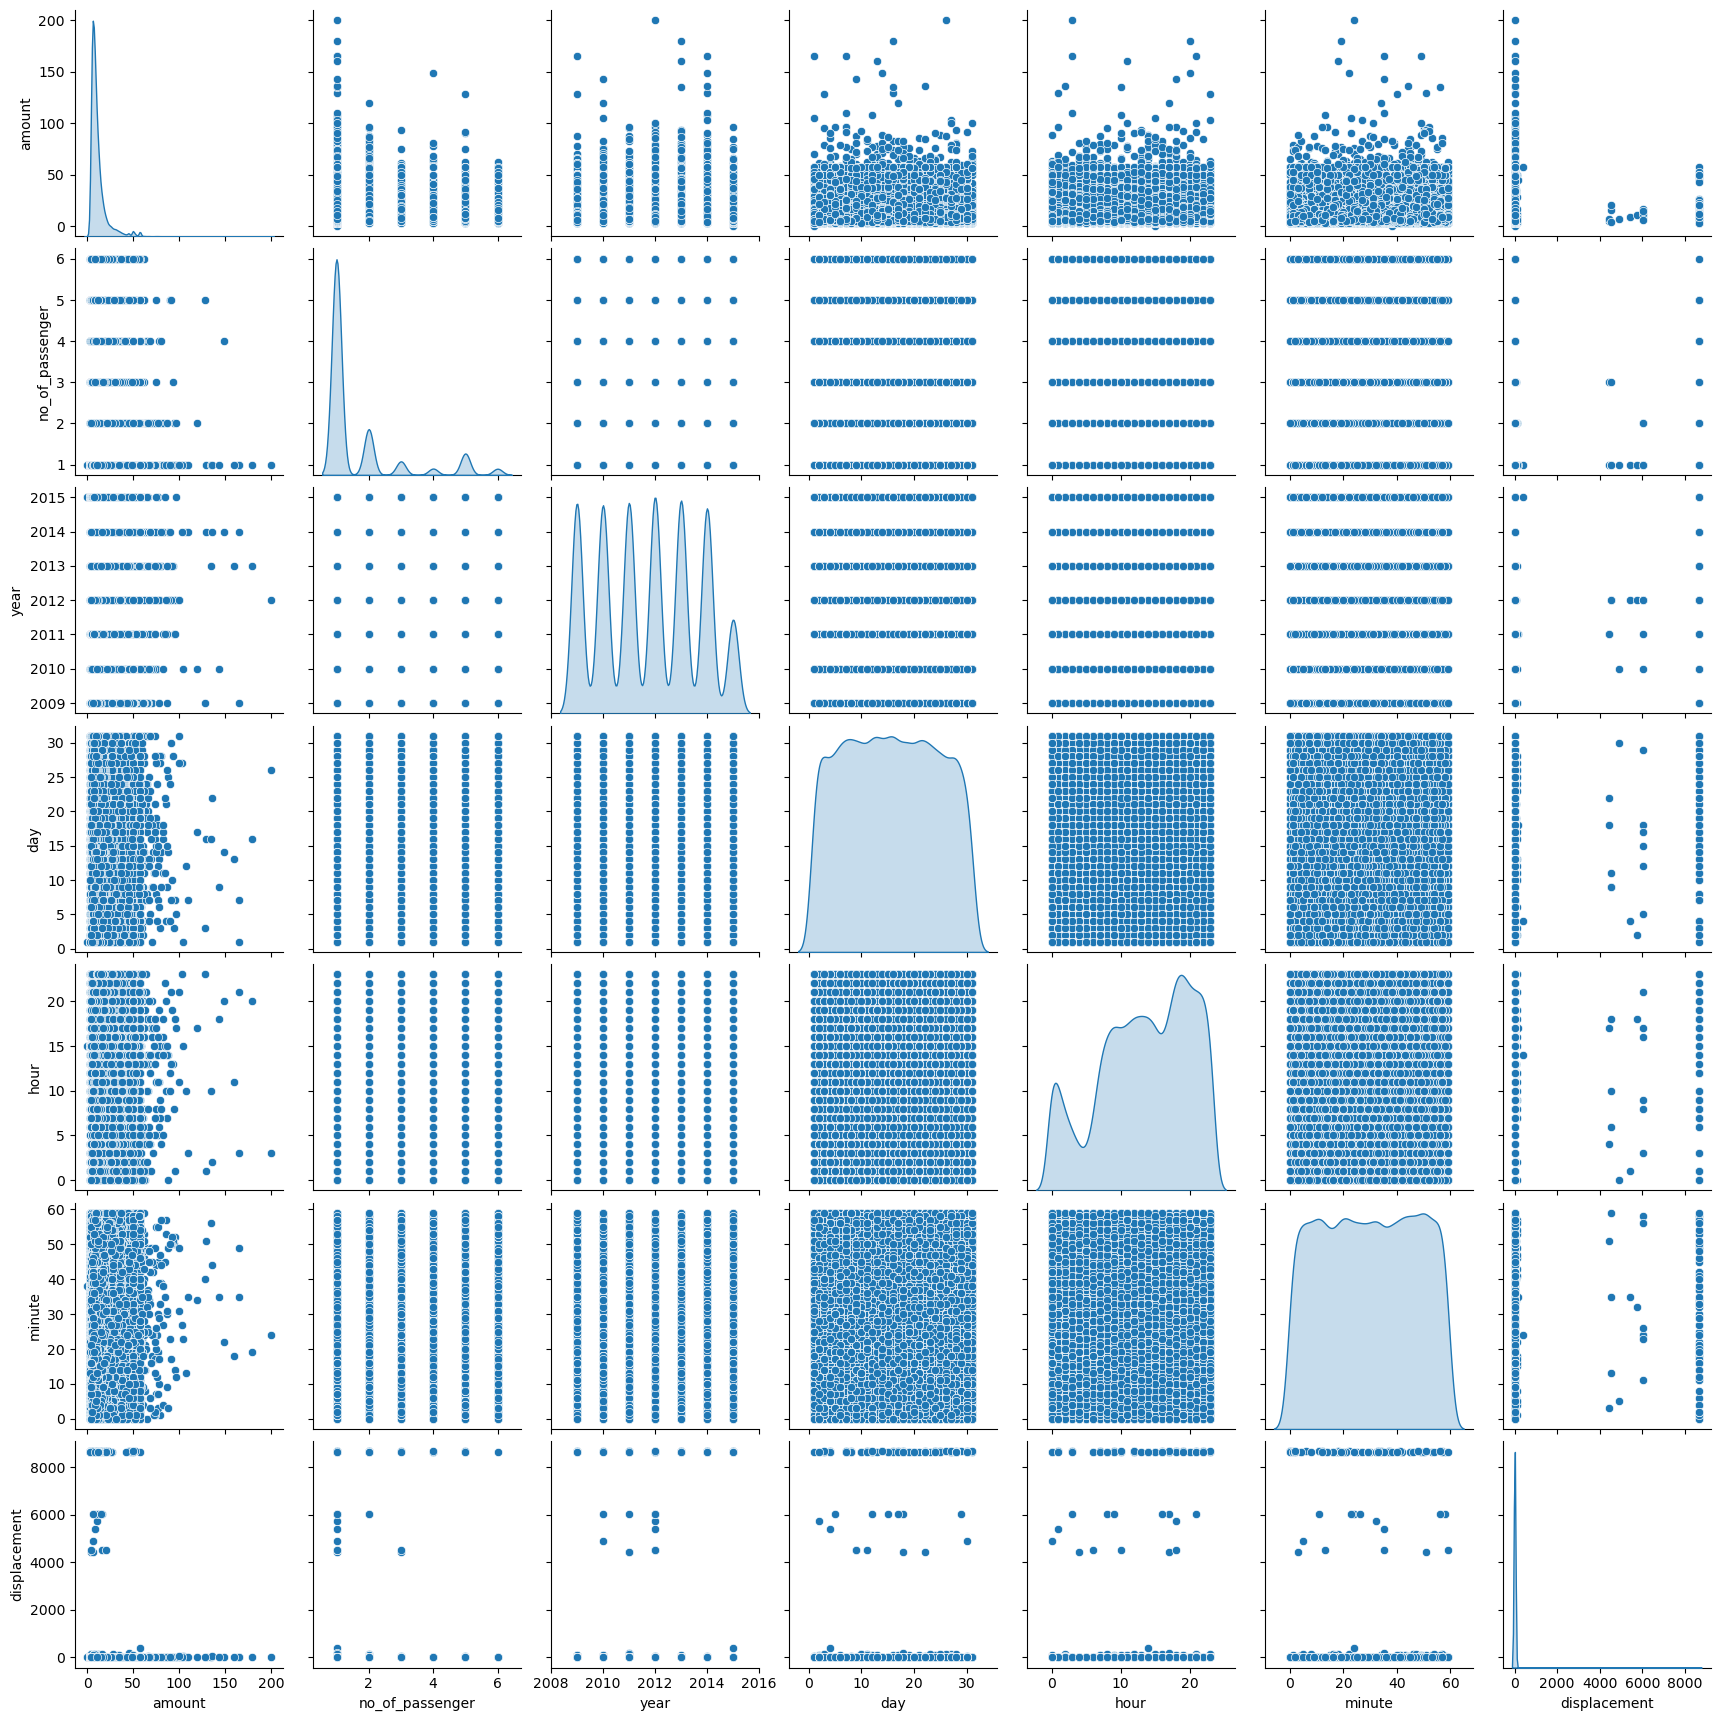

In [112]:
sns.pairplot(df,diag_kind='kde',palette='husl')

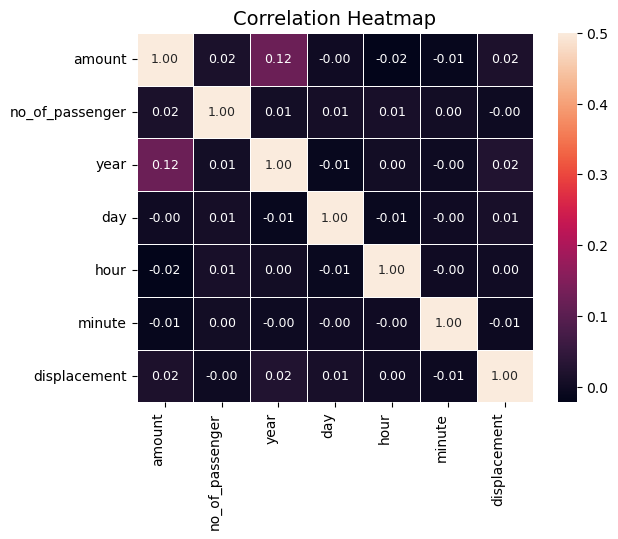

In [114]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, vmax=0.5, annot_kws={'fontsize':9})
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.show()

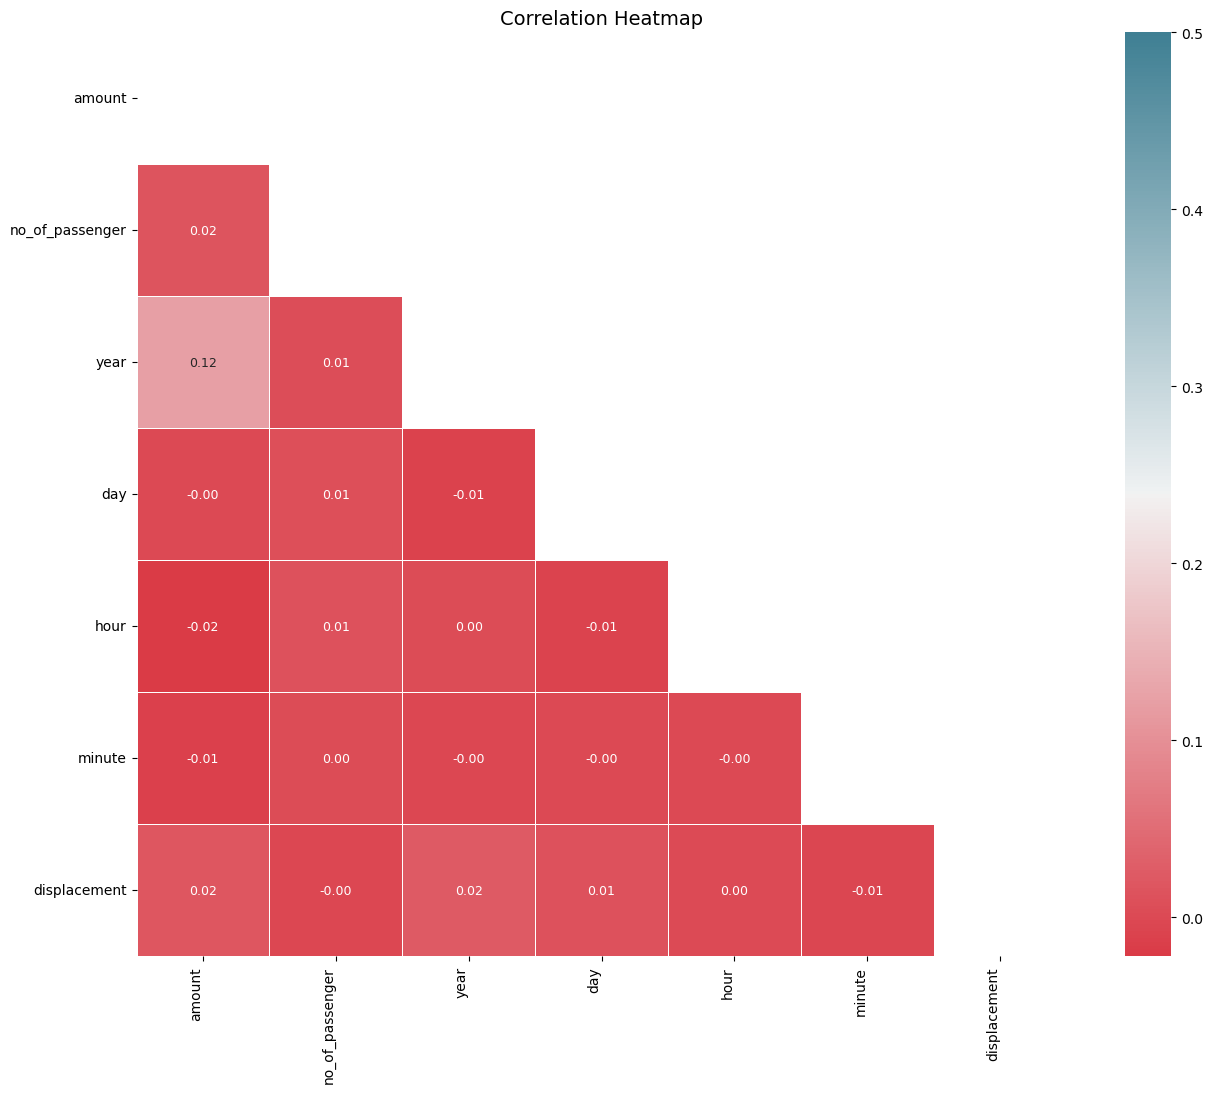

In [113]:
plt.figure(figsize=(15, 12))  # Set the figure size
colormap = sns.diverging_palette(10, 220, as_cmap = True)

# Create a mask for the upper triangle
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, cmap=colormap, annot=True, fmt=".2f", linewidths=0.5, vmax=0.5, annot_kws={'fontsize':9})
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.show()

# Encoding

In [37]:
df.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'year', 'month', 'day', 'hour', 'minute', 'weekday', 'morning',
       'afternoon', 'evening', 'night', 'late_night', 'displacement'],
      dtype='object')

In [38]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
year                      int64
month                    object
day                       int64
hour                      int64
minute                    int64
weekday                  object
morning                  object
afternoon                object
evening                  object
night                    object
late_night               object
displacement            float64
dtype: object

In [39]:
df = pd.get_dummies(df,columns =['month', 'weekday', 'morning','afternoon', 'evening', 'night', 'late_night'])

# Z Score

In [40]:
df1 = df.copy()
df1 = df1.apply(zscore)

In [41]:
df1.sample(10)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,day,hour,minute,displacement,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,morning_No,morning_Yes,afternoon_No,afternoon_Yes,evening_No,evening_Yes,night_No,night_Yes,late_night_No,late_night_Yes
41870,-0.469165,-0.038374,0.025505,-0.039286,0.034652,-0.523880,-0.934375,1.192135,0.847679,0.251190,-0.049984,-0.315602,-0.276230,-0.295368,-0.306686,-0.315958,-0.280457,-0.315364,-0.320137,-0.319154,3.510603,-0.297514,-0.2876,2.351014,-0.39089,-0.425145,-0.386873,-0.418137,-0.400504,-0.410049,0.600364,-0.600364,0.41742,-0.41742,0.499813,-0.499813,-1.822093,1.822093,0.428801,-0.428801
9262,1.169334,0.022857,-0.011251,0.002768,0.017202,0.251098,-1.469356,0.383840,0.079016,0.944426,-0.024170,3.168553,-0.276230,-0.295368,-0.306686,-0.315958,-0.280457,-0.315364,-0.320137,-0.319154,-0.284851,-0.297514,-0.2876,-0.425348,-0.39089,-0.425145,2.584828,-0.418137,-0.400504,-0.410049,0.600364,-0.600364,-2.39567,2.39567,0.499813,-0.499813,0.548820,-0.548820,0.428801,-0.428801
3178,-0.248598,-0.039902,0.027204,-0.036053,0.030031,-0.523880,0.135587,0.499311,-1.612045,0.713347,-0.046508,-0.315602,-0.276230,-0.295368,-0.306686,-0.315958,-0.280457,-0.315364,-0.320137,-0.319154,-0.284851,3.361184,-0.2876,-0.425348,-0.39089,2.352139,-0.386873,-0.418137,-0.400504,-0.410049,0.600364,-0.600364,0.41742,-0.41742,0.499813,-0.499813,0.548820,-0.548820,-2.332084,2.332084
47077,0.066498,-0.026828,0.031572,-0.032270,0.034844,-0.523880,0.670568,-1.001809,0.847679,0.886656,-0.046039,-0.315602,-0.276230,-0.295368,3.260667,-0.315958,-0.280457,-0.315364,-0.320137,-0.319154,-0.284851,-0.297514,-0.2876,-0.425348,-0.39089,-0.425145,-0.386873,2.391562,-0.400504,-0.410049,0.600364,-0.600364,0.41742,-0.41742,0.499813,-0.499813,-1.822093,1.822093,0.428801,-0.428801
25530,-0.175075,-0.043303,0.020965,-0.033571,0.036321,0.251098,-1.469356,-0.424455,1.308878,1.637661,-0.040794,-0.315602,-0.276230,-0.295368,-0.306686,-0.315958,-0.280457,3.170941,-0.320137,-0.319154,-0.284851,-0.297514,-0.2876,2.351014,-0.39089,-0.425145,-0.386873,-0.418137,-0.400504,-0.410049,0.600364,-0.600364,0.41742,-0.41742,0.499813,-0.499813,-1.822093,1.822093,0.428801,-0.428801
19242,0.224046,-0.043740,0.022092,-0.042744,0.019530,-0.523880,1.205549,-0.424455,-0.228450,0.713347,-0.044085,-0.315602,3.620166,-0.295368,-0.306686,-0.315958,-0.280457,-0.315364,-0.320137,-0.319154,-0.284851,-0.297514,-0.2876,-0.425348,-0.39089,-0.425145,-0.386873,-0.418137,2.496856,-0.410049,0.600364,-0.600364,-2.39567,2.39567,0.499813,-0.499813,0.548820,-0.548820,0.428801,-0.428801
38721,0.224046,-0.033401,0.027139,-0.020777,0.035476,-0.523880,1.740530,-0.193514,1.308878,-1.135280,-0.041416,-0.315602,-0.276230,-0.295368,-0.306686,-0.315958,-0.280457,-0.315364,-0.320137,3.133281,-0.284851,-0.297514,-0.2876,-0.425348,-0.39089,-0.425145,-0.386873,2.391562,-0.400504,-0.410049,0.600364,-0.600364,0.41742,-0.41742,0.499813,-0.499813,-1.822093,1.822093,0.428801,-0.428801
30395,-0.763254,-0.028254,0.035386,-0.029272,0.047194,0.251098,-1.469356,1.423076,-0.843381,0.020112,-0.049333,-0.315602,-0.276230,-0.295368,-0.306686,-0.315958,-0.280457,-0.315364,-0.320137,-0.319154,3.510603,-0.297514,-0.2876,-0.425348,-0.39089,2.352139,-0.386873,-0.418137,-0.400504,-0.410049,-1.665657,1.665657,0.41742,-0.41742,0.499813,-0.499813,0.548820,-0.548820,0.428801,-0.428801
46379,-0.763254,-0.037269,0.033475,-0.036913,0.045050,-0.523880,-1.469356,1.076664,0.693947,-1.019741,-0.049152,-0.315602,-0.276230,-0.295368,-0.306686,-0.315958,-0.280457,3.170941,-0.320137,-0.319154,-0.284851,-0.297514,-0.2876,-0.425348,-0.39089,-0.425145,-0.386873,2.391562,-0.400504,-0.410049,0.600364,-0.600364,0.41742,-0.41742,-2.000750,2.000750,0.548820,-0.

# Standardization 

In [42]:
df2 = df.copy()

std = StandardScaler()

cols = ['longitude_of_pickup', 'latitude_of_pickup','longitude_of_dropoff','year', 'day', 'hour', 'minute', 'latitude_of_dropoff', 'no_of_passenger','displacement']

for i in cols:
    df2[i] = std.fit_transform(df2[[i]])
    
df2.sample(5)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,day,hour,minute,displacement,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,morning_No,morning_Yes,afternoon_No,afternoon_Yes,evening_No,evening_Yes,night_No,night_Yes,late_night_No,late_night_Yes
28072,6.5,-0.040496,0.021683,-0.036022,0.034970,-0.523880,-0.934375,1.423076,-0.535915,0.020112,-0.044828,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0
19220,8.5,-0.037438,0.027728,-0.029442,0.042367,0.251098,-0.399394,-0.770868,-1.765778,-1.597437,-0.042867,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1
22642,5.5,-0.030759,0.031809,-0.028778,0.042792,0.251098,0.670568,0.614781,0.386481,1.579891,-0.048708,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0
23970,9.7,-0.037328,0.031247,-0.038419,0.034208,1.026075,-0.934375,-1.694634,0.693947,0.308960,-0.047257,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0
31333,7.3,-0.026858,0.031535,-0.033320,0.032957,-0.523880,-0.934375,1.192135,1.308878,1.117734,-0.044382,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0


# Model building

## Decision tree Regressor (Z score)

In [43]:
X1 = df1.drop('amount',axis=1)
y1 = df1['amount']

X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=0)

model_1 = DecisionTreeRegressor()
model_1.fit(X_train,y_train)

print('train - ', model_1.score(X_train,y_train))
print('test - ', model_1.score(X_test,y_test))

train -  1.0
test -  0.6448894331333364


In [44]:
model_2 = DecisionTreeRegressor(max_depth = 5)
model_2.fit(X_train,y_train)

print('train - ', model_2.score(X_train,y_train))
print('test - ', model_2.score(X_test,y_test))

train -  0.8042327264672199
test -  0.7922265322397473


## Decision tree Regressor (Standardization)

In [45]:
X2 = df2.drop('amount',axis=1)
y2 = df2['amount']

X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.3,random_state=0)

model_3 = DecisionTreeRegressor()
model_3.fit(X_train,y_train)

print('train - ', model_3.score(X_train,y_train))
print('test - ', model_3.score(X_test,y_test))

train -  1.0
test -  0.6721681070129581


In [46]:
model_4 = DecisionTreeRegressor(max_depth = 5)
model_4.fit(X_train,y_train)

print('train - ', model_4.score(X_train,y_train))
print('test - ', model_4.score(X_test,y_test))

train -  0.8042327264672199
test -  0.7922265322397471


## Random forest regressor 

In [47]:
X1 = df1.drop('amount',axis=1)
y1 = df1['amount']

X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=0)

model_5 = RandomForestRegressor()
model_5.fit(X_train,y_train)

print('train - ', model_5.score(X_train,y_train))
print('test - ', model_5.score(X_test,y_test))


train -  0.9756129269640227
test -  0.8315421320664995


In [49]:
model_5 = RandomForestRegressor(n_estimators=300,criterion='friedman_mse', max_depth= 5)
model_5.fit(X_train,y_train)

print('train - ', model_5.score(X_train,y_train))
print('test - ', model_5.score(X_test,y_test))


train -  0.8237188780852631
test -  0.8075997798882231


In [115]:
model_5 = RandomForestRegressor(n_estimators=101,criterion='friedman_mse', max_depth= 5)
model_5.fit(X_train,y_train)

print('train - ', model_5.score(X_train,y_train))
print('test - ', model_5.score(X_test,y_test))

train -  0.8232178725665587
test -  0.8079990704739664
